# PricePulse: Strategic Pricing & Inventory Recommendations

Translate future inflation forecasts into actionable business strategies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load Historical + Forecast Data
historical_df = pd.read_csv('../data/processed/inflation_features.csv')
historical_df['date'] = pd.to_datetime(historical_df['date'])

forecast_df = pd.read_csv('../outputs/forecast.csv')
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

## 1. Forecast Visualization
Visualizing the MoM Inflation trend: Historical (Last 2 Years) + 6 Months Forecast.

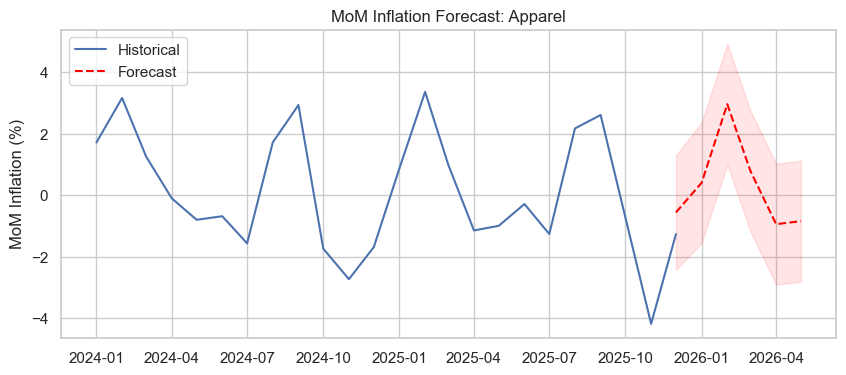

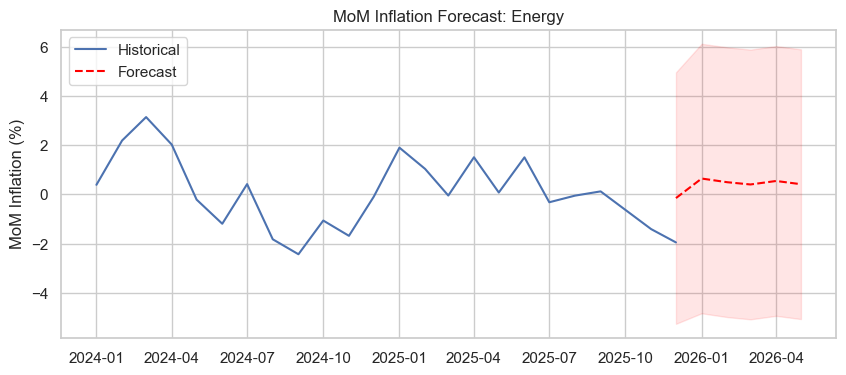

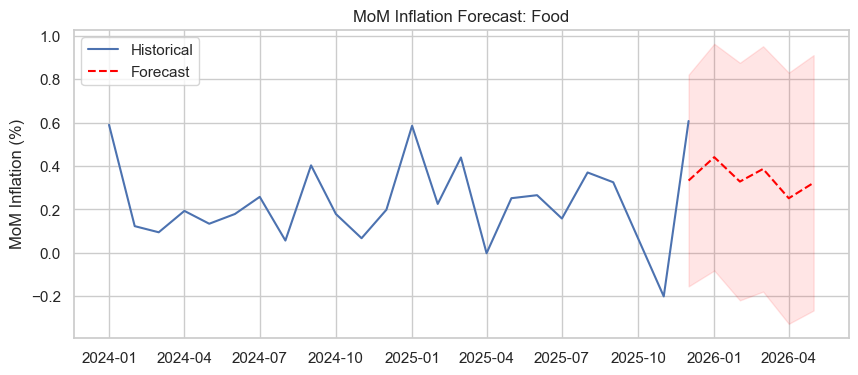

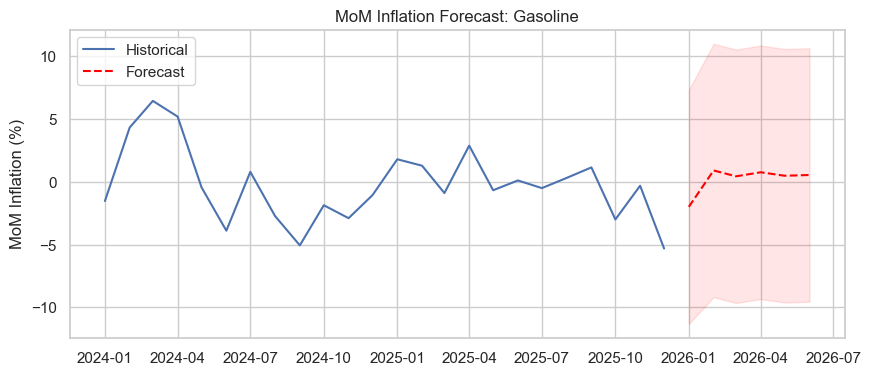

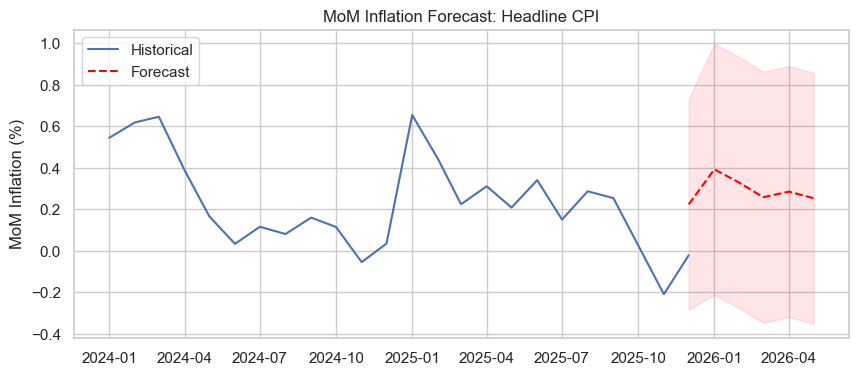

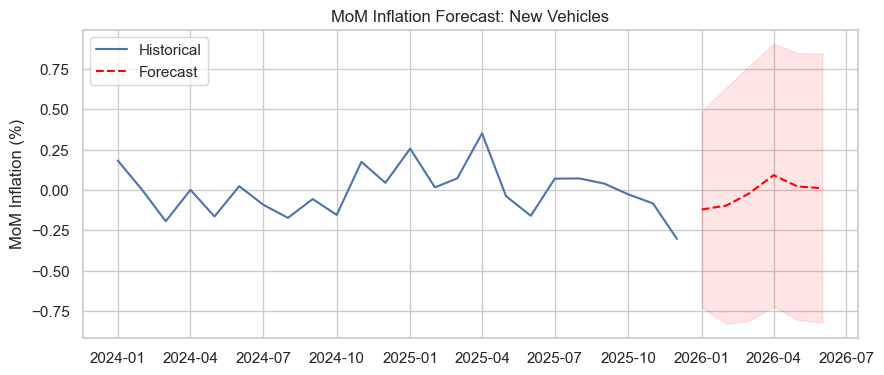

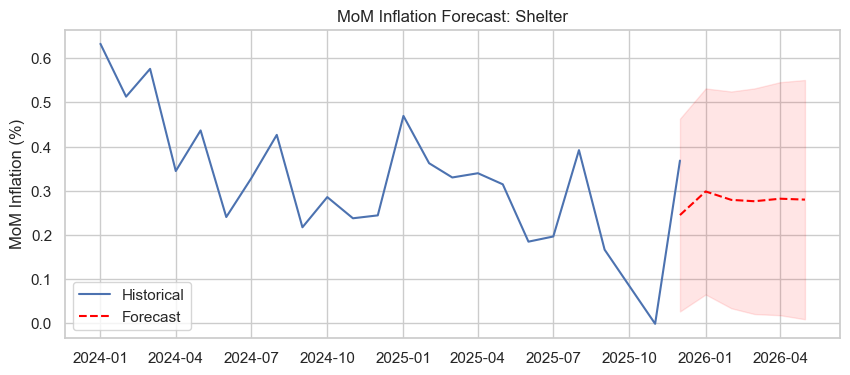

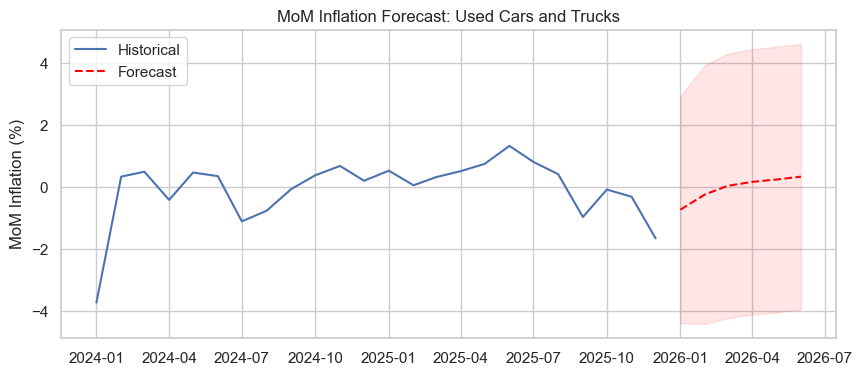

In [3]:
recent_history = historical_df[historical_df['date'] > (historical_df['date'].max() - pd.DateOffset(months=24))]

categories = forecast_df['category'].unique()

for cat in categories:
    cat_hist = recent_history[recent_history['category'] == cat]
    cat_fc = forecast_df[forecast_df['category'] == cat]
    
    plt.figure(figsize=(10, 4))
    plt.plot(cat_hist['date'], cat_hist['MoM_Inflation'], label='Historical')
    plt.plot(cat_fc['date'], cat_fc['forecast_value'], label='Forecast', linestyle='--', color='red')
    plt.fill_between(cat_fc['date'], cat_fc['lower_ci'], cat_fc['upper_ci'], color='red', alpha=0.1)
    plt.title(f'MoM Inflation Forecast: {cat}')
    plt.ylabel('MoM Inflation (%)')
    plt.legend()
    plt.show()

## 2. Business Logic & Recommendations

**Logic:**
- **Inflation Rising (> 0.5% MoM)**: 
    - **Pricing**: Increase prices proactively.
    - **Inventory**: Stockpile now to avoid higher costs.
- **Inflation Stable/Low (0 - 0.5% MoM)**:
    - **Pricing**: Maintain competitive pricing.
    - **Promotion**: Run promotions to drive volume.
- **Deflation (< 0% MoM)**:
    - **Pricing**: Discount to clear inventory.
    - **Contracts**: Lock in long-term supply contracts.

In [4]:
recommendations = []

for cat in categories:
    # Average forecast inflation for next 3 months
    cat_fc = forecast_df[forecast_df['category'] == cat]
    avg_inf = cat_fc['forecast_value'].iloc[:3].mean()
    
    if avg_inf > 0.5:
        strategy = "Increase Prices / Stockpile"
        rationale = f"High predicted inflation ({avg_inf:.2f}% MoM)."
    elif avg_inf < 0:
        strategy = "Discount / Long-term Supplier Contracts"
        rationale = f"Predicted deflation ({avg_inf:.2f}% MoM)."
    else:
        strategy = "Maintain / Promotions"
        rationale = f"Stable inflation ({avg_inf:.2f}% MoM)."
        
    recommendations.append({
        "Category": cat,
        "Avg_3M_Forecast_MoM": avg_inf,
        "Strategy": strategy,
        "Rationale": rationale
    })

strategy_df = pd.DataFrame(recommendations)
strategy_df.sort_values("Avg_3M_Forecast_MoM", ascending=False)

,Category,Avg_3M_Forecast_MoM,Strategy,Rationale
0,Apparel,0.930799,Increase Prices / Stockpile,High predicted inflation (0.93% MoM).
2,Food,0.367373,Maintain / Promotions,Stable inflation (0.37% MoM).
1,Energy,0.327926,Maintain / Promotions,Stable inflation (0.33% MoM).
4,Headline CPI,0.314622,Maintain / Promotions,Stable inflation (0.31% MoM).
6,Shelter,0.274133,Maintain / Promotions,Stable inflation (0.27% MoM).
5,New Vehicles,-0.079122,Discount / Long-term Supplier Contracts,Predicted deflation (-0.08% MoM).
3,Gasoline,-0.217911,Discount / Long-term Supplier Contracts,Predicted deflation (-0.22% MoM).
7,Used Cars and Trucks,-0.314888,Discount / Long-term Supplier Contracts,Predicted deflation (-0.31% MoM).
